In [11]:
#load the data
import requests
r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale''')
from sklearn.datasets import load_svmlight_file
from io import BytesIO
X , y = load_svmlight_file(f = BytesIO(r.content), n_features=13)
#print(X.shape)
#print(y.shape)
#print(y)
#print('------------')
#print(X)
#print('------------')
X = X.toarray()
#print(X)

In [12]:
import numpy

# process the data and make data more easy to compute
n_samples, n_features = X.shape
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))
#print(X)
y = y.reshape((-1, 1))

In [13]:
#split the data 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

In [14]:
# define some parameters that are important 
factor = 0.5 
learning_rate = 0.0005
epoch = 300

losses_train = []
losses_val = []
#initialize
w = numpy.zeros((n_features + 1, 1)) 

In [16]:
for epoch in range(epoch):
    res = numpy.dot(X_train, w) - y_train
    G = factor * w + numpy.dot(X_train.transpose(), res)  # calculate the gradient
    D = -G
    #print('This is epoch',epoch)
    #print(D)
    w += learning_rate * D  # update the parameters

    Y_predict = numpy.dot(X_train, w)  # predict under the train set
    loss_train = numpy.average(numpy.abs(Y_predict - y_train))  # calculate the absolute differences
    losses_train.append(loss_train)

    Y_predict = numpy.dot(X_val, w)  # predict under the validation set
    loss_val = numpy.average(numpy.abs(Y_predict - y_val))  # calculate the absolute differences
    losses_val.append(loss_val)

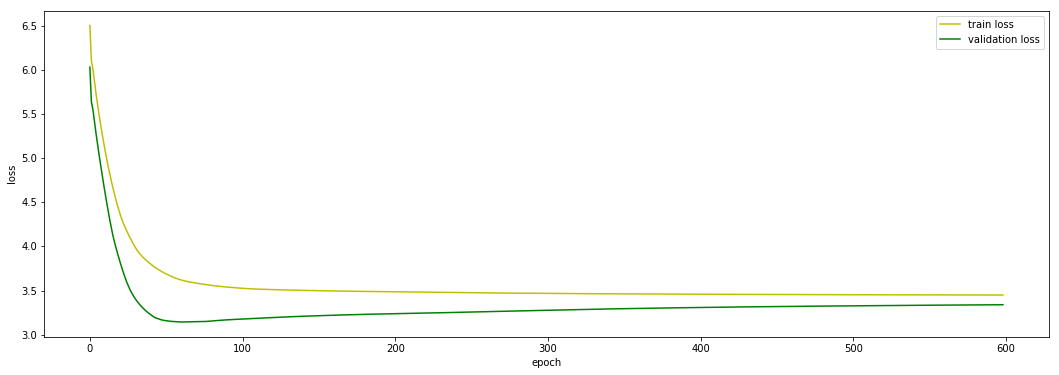

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="y", label="train loss")
plt.plot(losses_val, "-", color="g", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
